In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [4]:
X, y = mnist["data"], mnist["target"]
>>> X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
>>> X.shape
(70000, 784)  

(70000, 784)

In [7]:
>>> y.shape
(70000,)

(70000,)

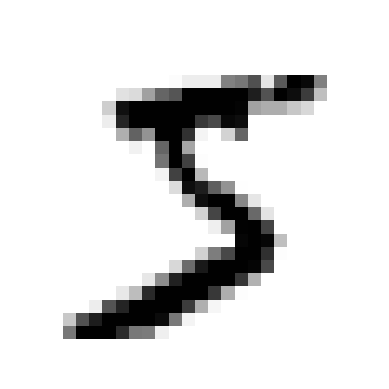

In [25]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [28]:
>>> y[0] == '5'

True

In [13]:
x_train, y_train, x_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [29]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [30]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [31]:
sgd_clf.predict([some_digit])

array([ True])

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [34]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(x_train, y_train_5)
print(any(dummy_clf.predict(x_train)))  # Always predicts the most frequent class

False


In [35]:
cross_val_score(dummy_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [36]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_predict)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [38]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method="decision_function")

In [39]:
from sklearn.metrics import precision_recall_curve
precision, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

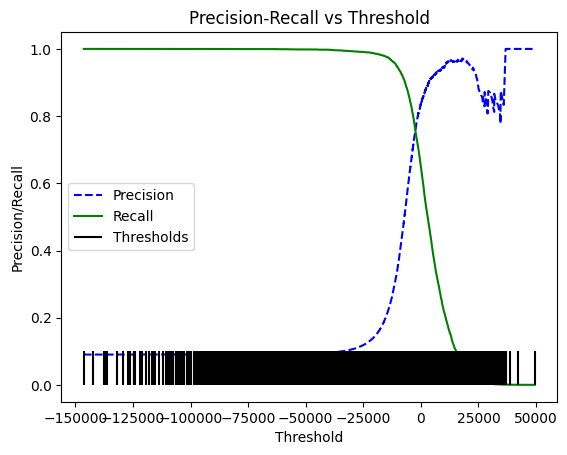

In [44]:
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.vlines(thresholds,0,0.1,"k",label="Thresholds")  # Commented out to remove black lines
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision-Recall vs Threshold")
plt.show()

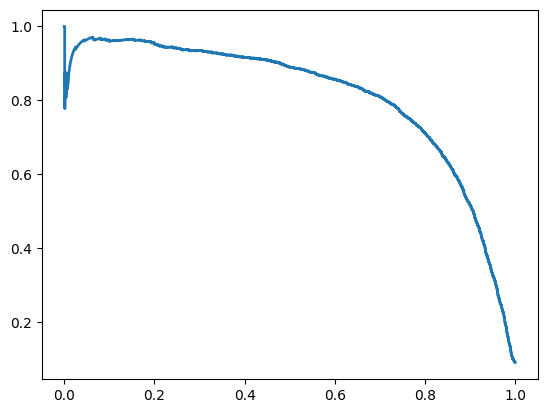

In [45]:
plt.plot(recalls, precision, linewidth=2, label="Precision-Recall Curve");

In [46]:
idx_for_90_precision = (precision>=0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]

In [47]:
y_train_pred_90 = (y_scores>=threshold_for_90_precision)

In [48]:
from sklearn.metrics import precision_score

precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [49]:
from sklearn.metrics import recall_score

recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) 

array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
       1.        ])

In [53]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [55]:
y_probab_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method="predict_proba")

In [56]:
>>> y_probab_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [ ]:
y_scores_forest = y_probab_forest[:, 1]  # Score = proba of positive class
precision_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest) 